# Сигментация опухоли

Программа для сигментации опухоли по изображению, используя cv2.

In [1]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import cv2

In [2]:
file_path = ''
img_name = 'suh_before_operation_T2.dcm'

Загружаем DICOM срез и преобразуем его в numpy массив

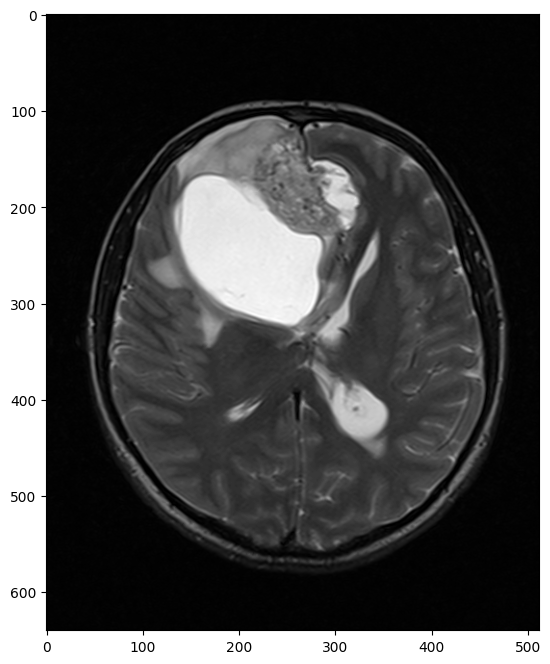

In [15]:
ds = pydicom.dcmread(file_path + img_name)
plt.figure(figsize=(8, 8))
plt.imshow(ds.pixel_array, cmap='gray') 

Необхожимо вручную выделить квадратную область, которая будет включать опухоль

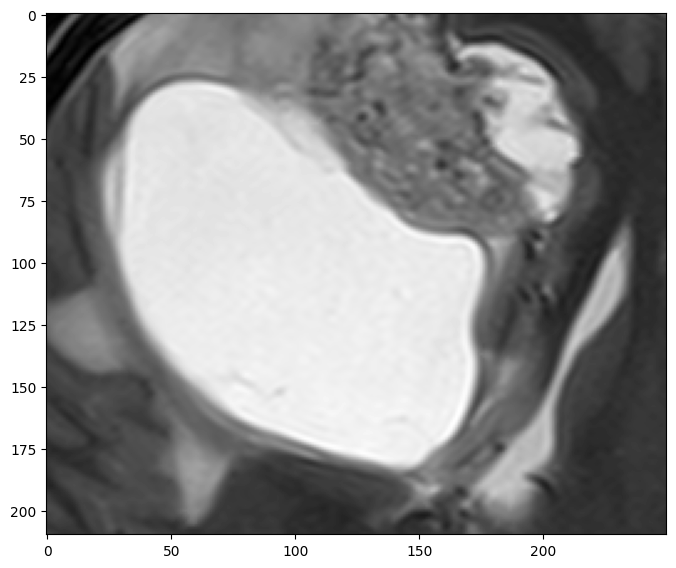

In [16]:
croped_img = ds.pixel_array[140:350, 110:360]
plt.figure(figsize=(8, 8))
plt.imshow(croped_img, cmap='gray') 

Вручную подбираем яркость (contour_intense), по которой будет находится контур. Изображение 16 битное, поэтому интенсивность от 0 до 2**16

In [17]:
contour_intense = 1000
ret, thresh = cv2.threshold(croped_img, contour_intense, 255, cv2.THRESH_BINARY)
thresh = thresh.astype('uint8')
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(croped_img)

Функция вывела множество контуров, найдем самый большой контур

In [18]:
max_contour = max(contours, key=len)

In [26]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

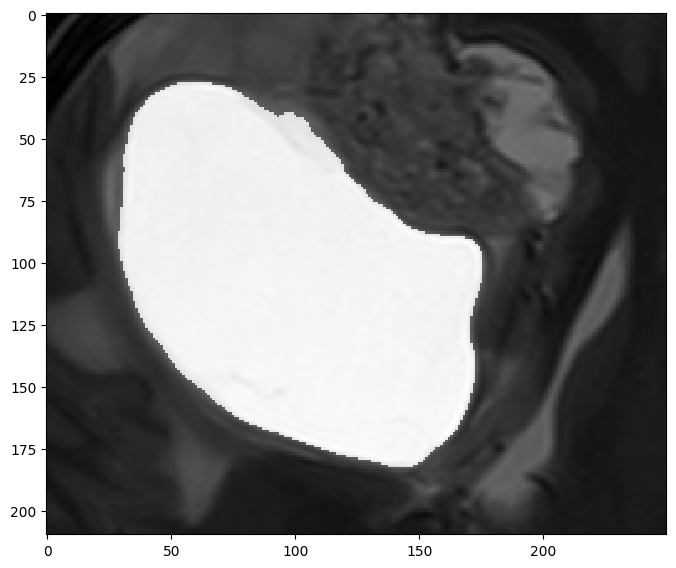

In [19]:
cv2.drawContours(mask, [max_contour], -1, (2**16, 2**16, 2**16), -1)
plt.figure(figsize=(8, 8))
plt.imshow(croped_img, cmap='gray', interpolation='none')
plt.imshow(mask, cmap='gray', interpolation='none', alpha=0.5)

Обрезаем по контуру:

In [20]:
out = np.zeros_like(croped_img)
max_intense = np.max(mask)
out[mask == max_intense] = croped_img[mask == max_intense]

Вырезаем прямоугольную область:

In [21]:
y, x = np.where(mask == max_intense)
topy, topx = np.min(y), np.min(x)
bottomy, bottomx = np.max(y), np.max(x)
out = out[topy:bottomy+1, topx:bottomx+1]

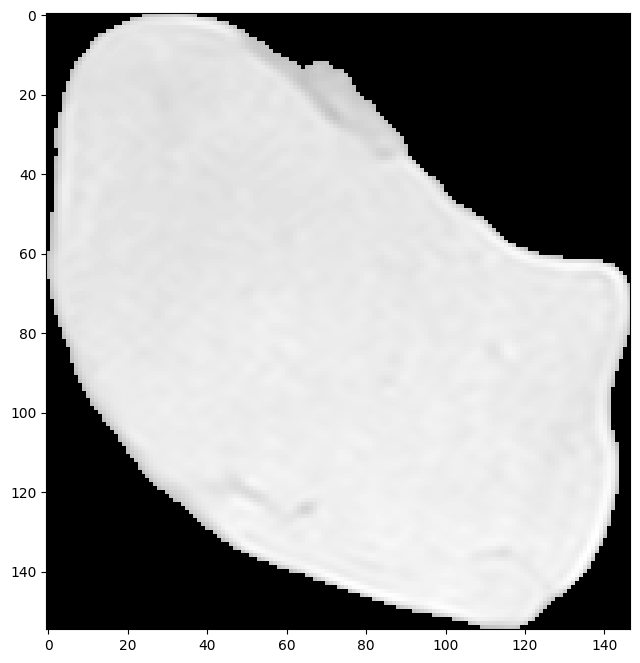

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(out, cmap='gray')

Выделение прошло успешно